## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

In [1]:
! git clone https://www.github.com/DS3001/kmc



Cloning into 'kmc'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 25 (delta 5), reused 1 (delta 0), pack-reused 0
Receiving objects: 100% (25/25), 4.68 MiB | 10.86 MiB/s, done.
Resolving deltas: 100% (5/5), done.


**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [20]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('/content/kmc/data/airbnb_hw.csv')

df['price'] = df['Price']
df['n_reviews'] = df['Number Of Reviews']
df['score'] = df['Review Scores Rating']

X = df.loc[:,['price','Beds','n_reviews','score']]

X.head()

,price,Beds,n_reviews,score
0,145,1.0,0,NaN
1,37,1.0,1,NaN
2,28,1.0,1,NaN
3,199,3.0,0,NaN
4,549,3.0,39,96.0


In [21]:
X['price'] = X['price'].str.replace(',','')
X['price'] = pd.to_numeric(X['price'],errors='coerce')

X['Beds'] = X['Beds'].fillna(1)

X = X.dropna()

2. Maxmin normalize the data and remove any nan's (KMeans from sklearn doesn't accept nan input).

In [22]:
def maxmin(x):
  y = (x-min(x))/(max(x)-min(x))
  return y

Y = X.drop('price',axis=1)
Y = Y.apply(maxmin)

3. Use sklearn's KMeans module to cluster the data by Beds, Number of Reviews, and Review Scores Rating for k=6.

In [23]:
mod = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)
mod = mod.fit(Y)
Y['cluster'] = mod.labels_

4. Use seaborn's .pairplot() to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

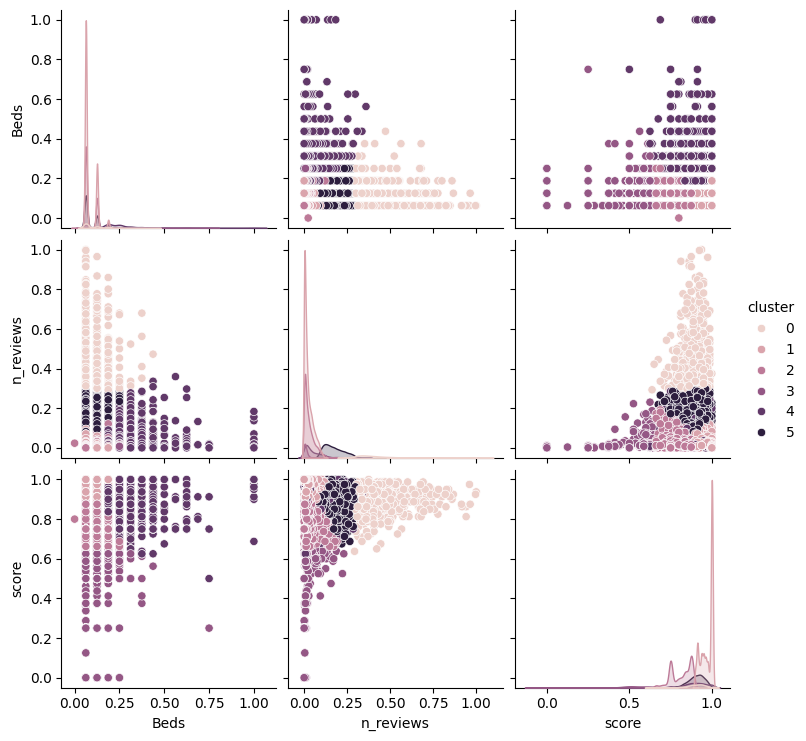

In [24]:
import seaborn as sns

sns.pairplot(data=Y, hue = 'cluster')

5. Use .groupby and .describe to compute the average price for each cluster. Which clusters have the highest rental prices?

In [26]:
X['cluster']=mod.labels_

X.loc[:,['price','cluster']].groupby('cluster').describe()

price                                                              
           count        mean         std   min     25%    50%     75%      max
cluster                                                                       
0          794.0  133.238035   83.077776  27.0   80.00  110.0  168.50    875.0
1        10512.0  152.233352  147.281729  10.0   85.00  130.0  190.00  10000.0
2         5554.0  131.496579  102.621585  20.0   75.00  110.0  169.00   5000.0
3          632.0  133.587025  215.505565  25.0   65.00   99.0  151.25   5000.0
4         1633.0  293.458665  262.439199  27.0  150.00  229.0  350.00   4500.0
5         3030.0  141.674917   84.134011  22.0   87.25  125.0  175.00   1000.0

Looks like cluster 4 has the highest mean by a large margin. We can see this is not due to outliers as it also contains a much higher 25% and 75% percentile threshold

6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

<Axes: >

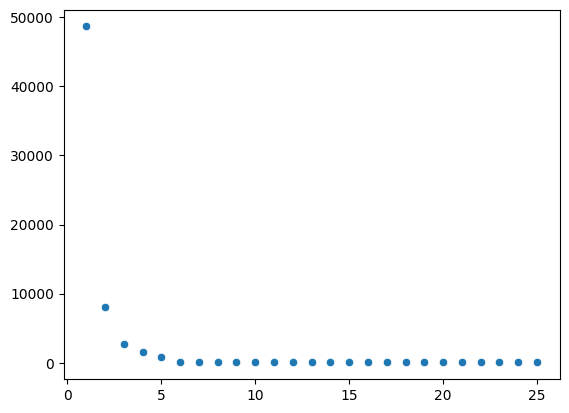

In [32]:
import numpy as np

k_bar = 25
k_range = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
  mod = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
  mod=mod.fit(Y)
  SSE[k]=mod.inertia_

sns.scatterplot(x=k_range, y=SSE)

price                                                            
           count        mean         std   min   25%    50%     75%      max
cluster                                                                     
0        11306.0  150.899345  143.791840  10.0  85.0  129.0  189.00  10000.0
1         4663.0  194.830152  184.264122  22.0  99.0  150.0  225.00   4500.0
2         6186.0  131.710152  119.136944  20.0  75.0  110.0  168.75   5000.0

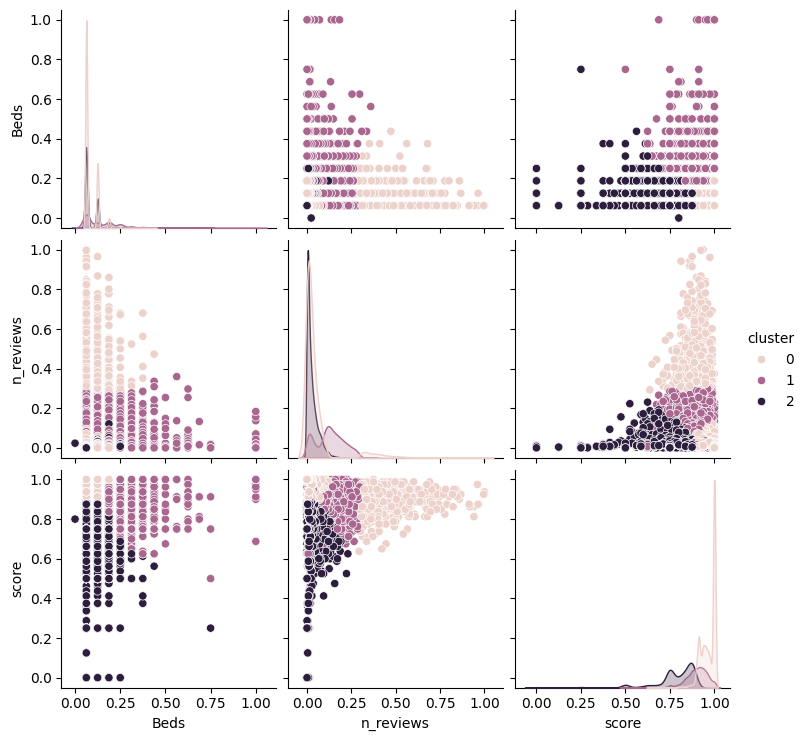

In [34]:
mod=KMeans(n_clusters=3, max_iter=300, n_init=10, random_state=0)
mod=mod.fit(Y)
Y['cluster'] = mod.labels_



sns.pairplot(data=Y,hue='cluster')
X['cluster']=mod.labels_
X.loc[:,['price','cluster']].groupby('cluster').describe()

Cluster 1 ends up ending with highest average price. Again like previous cluster 4, this does not seem to be due to outliers and is likey just the expensive cluster of the 3. Despite this, cluster 0 seems to have the highest average score whiile clusters 1 and 2 are considerably worse.  

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [35]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?


<Axes: xlabel='x1', ylabel='x2'>

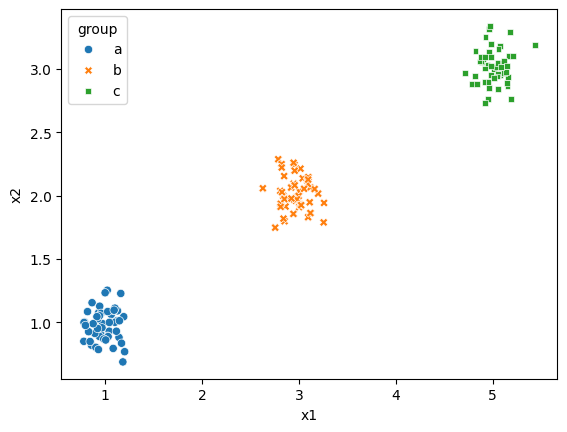

In [36]:
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

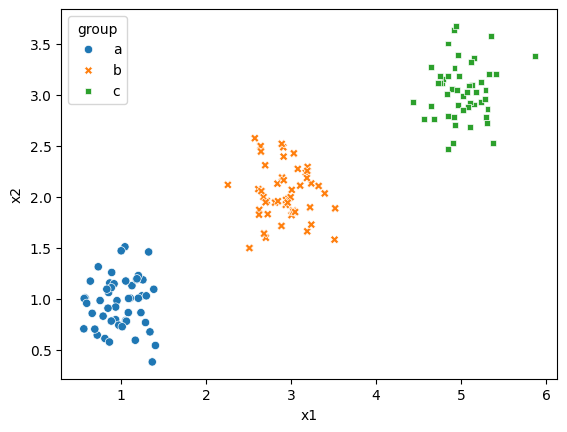

In [37]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

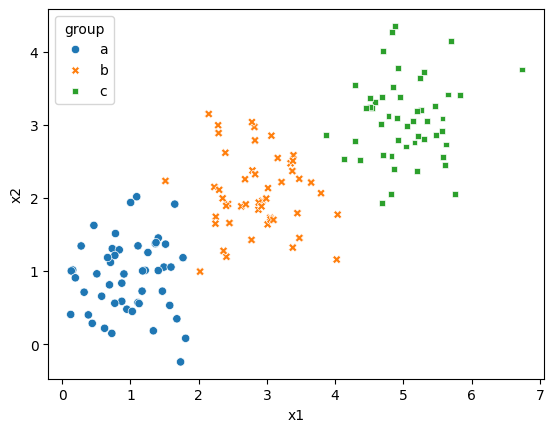

In [39]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

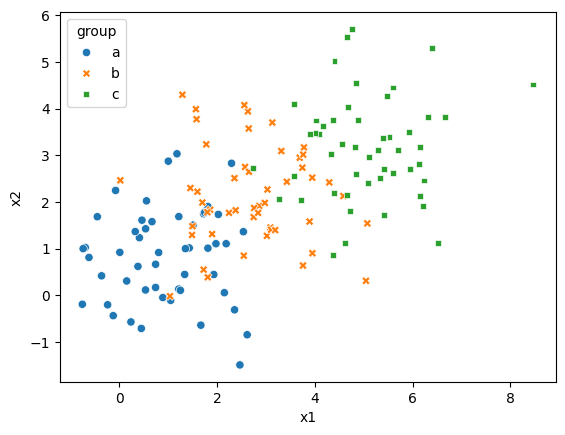

In [40]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

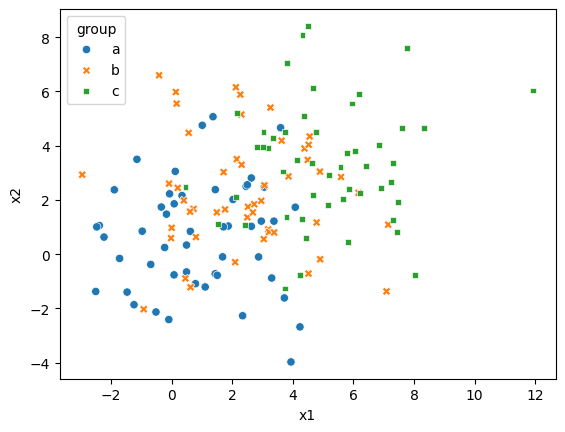

In [41]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

As the noise goes up, the distinctness of the clusters essentially disappears with the last graph appearing as completely random clusters.

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$

In [56]:
def maxmin(x):
  y = (x-min(x))/(max(x)-min(x))
  return y

def scree(df):
  X=df.loc[:,['x1','x2']]
  X = X.apply(maxmin)

  k_bar = 15
  k_range = np.arange(1,k_bar+1)
  SSE = np.zeros(k_bar)
  for k in range(k_bar):
    mod = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    mod=mod.fit(X)
    SSE[k]=mod.inertia_

  scree_plot, axes = plt.subplots()
  sns.lineplot(x=k_range, y=SSE)
  axes.set_ylim(0, 35)

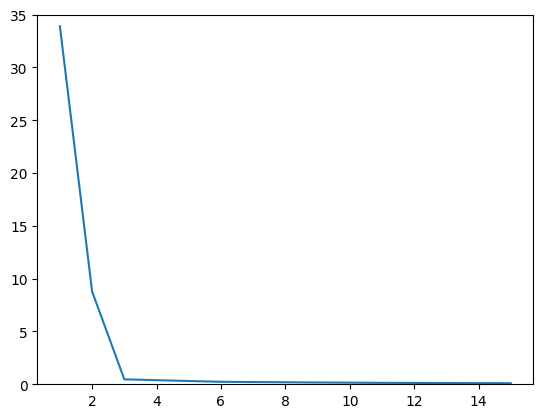

In [57]:
scree(df0_125) #obvious elbow around 3/4

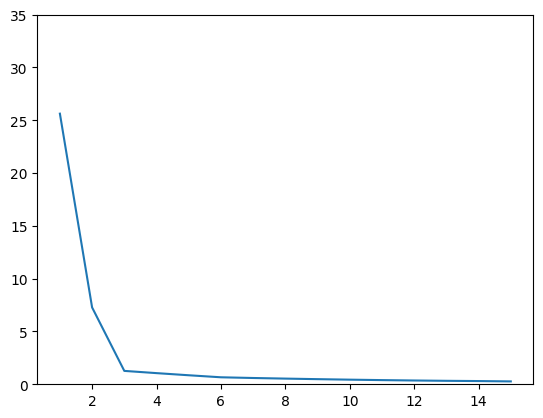

In [58]:
scree(df0_25) #obvious elbow around 3/4

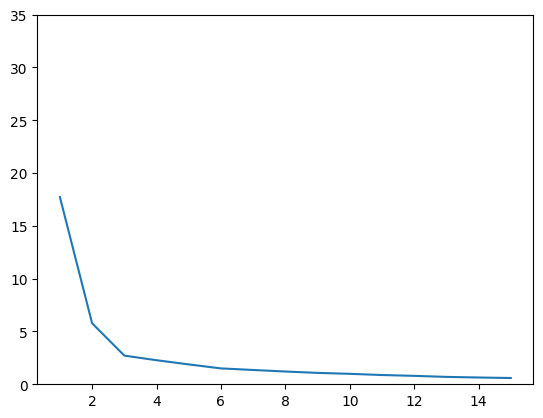

In [59]:
scree(df0_5) #obvious elbow around 2/3

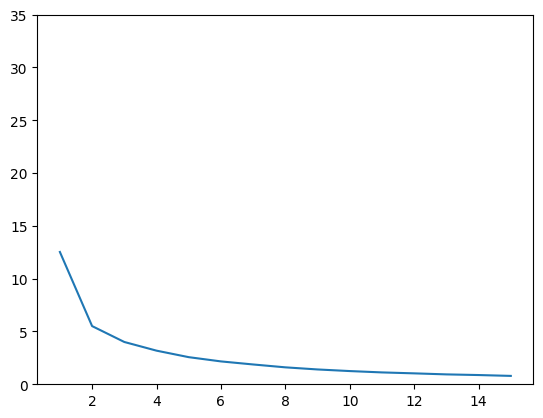

In [60]:
scree(df1_0) #obvious elbow around 2/3

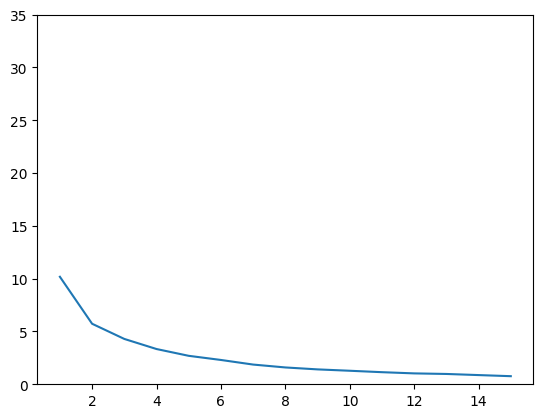

In [61]:
scree(df2_0) #No obvious elbow

4. Explain the intuition of the elbow, using this numerical simulation as an example.

The intuition of the elbow approach is that when groups are almost completely visually defined, it can interpret the idela number of clusters. However, as the groups become more cohesive and noisy, there is really no group to cluster for in the first place. We can see this with the first dataset where there is a clear elbow and drop off at 3 which minimizes SSE. However in the last graph, there is no real dropoff, just indicating that the more groups the better (even though this is not what we want)

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?